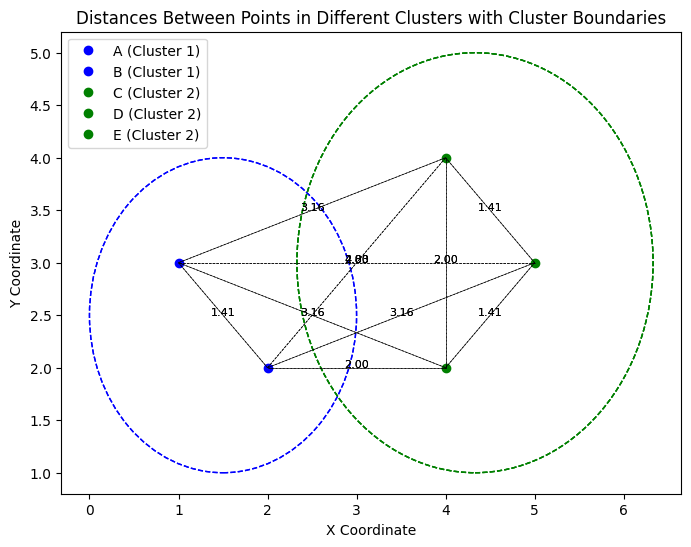

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define the points and their coordinates
points = {'A': (1, 3), 'B': (2, 2), 'C': (4, 4), 'D': (5, 3), 'E': (4, 2)}
cluster_assignments = {'A': 'Cluster 1', 'B': 'Cluster 1', 'C': 'Cluster 2', 'D': 'Cluster 2', 'E': 'Cluster 2'}

# Calculate Euclidean distances between each pair of points
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

distances = {point: {} for point in points}
for point1 in points:
    for point2 in points:
        if point1 != point2:
            distances[point1][point2] = euclidean_distance(points[point1], points[point2])

# Updating the plot to visually differentiate the clusters

fig, ax = plt.subplots(figsize=(8, 6))

# Define colors for different clusters for clarity
cluster_colors = {'Cluster 1': 'blue', 'Cluster 2': 'green'}

# Plot points and cluster circles
for point, coord in points.items():
    cluster = cluster_assignments[point]
    ax.plot(coord[0], coord[1], 'o', color=cluster_colors[cluster], label=f"{point} ({cluster})")

    # Drawing a circle around each cluster
    if cluster == 'Cluster 1':
        circle_radius = 1.5  # Radius for the circle around cluster 1
        cluster_center = (1.5, 2.5)  # A hypothetical center for cluster 1
        ax.add_patch(plt.Circle(cluster_center, circle_radius, color='blue', fill=False, linestyle='--'))
    else:
        circle_radius = 2  # Radius for the circle around cluster 2
        cluster_center = (4.33, 3)  # A hypothetical center for cluster 2
        ax.add_patch(plt.Circle(cluster_center, circle_radius, color='green', fill=False, linestyle='--'))

# Annotate distances
for point1 in points:
    for point2 in points:
        if point1 != point2:
            mid_point = ((points[point1][0] + points[point2][0]) / 2, (points[point1][1] + points[point2][1]) / 2)
            distance = distances[point1][point2]
            ax.text(*mid_point, f"{distance:.2f}", fontsize=8, ha='center')

# Draw lines for visualization
for point1 in points:
    for point2 in points:
        if point1 != point2:
            ax.plot([points[point1][0], points[point2][0]], [points[point1][1], points[point2][1]], 'k--', lw=0.5)

# Set labels and title
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('Distances Between Points in Different Clusters with Cluster Boundaries')
ax.legend()

# Show plot
plt.show()


Um den durchschnittlichen Abstand innerhalb eines Clusters und den durchschnittlichen Abstand zu einem anderen Cluster für jeden Datenpunkt zu berechnen, folgen wir diesen Schritten:

1. **Durchschnittlicher Abstand innerhalb des Clusters (a):** Für jeden Punkt im Cluster berechnen wir den durchschnittlichen Abstand zu allen anderen Punkten im selben Cluster.

2. **Durchschnittlicher Abstand zum nächsten Cluster (b):** Für jeden Punkt berechnen wir den durchschnittlichen Abstand zu allen Punkten im nächstgelegenen Cluster.

Zur Veranschaulichung führen wir dies für unser Beispiel mit fünf Punkten A, B, C, D und E durch, die auf zwei Cluster verteilt sind (Cluster 1 mit A und B, Cluster 2 mit C, D und E).

Nehmen wir an, wir kennen die direkten Abstände zwischen allen Punkten. Zur Vereinfachung verwenden wir hypothetische Abstände:

- Abstände innerhalb von Cluster 1:
  - Abstand A zu B: 4
- Abstände innerhalb von Cluster 2:
  - Abstand C zu D: 3
  - Abstand C zu E: 2
  - Abstand D zu E: 3
- Abstände zwischen den Clustern:
  - Abstände von A zu C, D, E: 6, 7, 5
  - Abstände von B zu C, D, E: 5, 6, 3

Jetzt berechnen wir die durchschnittlichen Abstände:

1. **Durchschnittlicher Abstand innerhalb von Cluster 1:**
   - Für A und B: Da es nur ein anderes Mitglied im Cluster gibt, ist der durchschnittliche Abstand gleich dem Abstand zwischen A und B, also 4.

2. **Durchschnittlicher Abstand innerhalb von Cluster 2:**
   - Für C: Der Durchschnitt der Abstände zu D und E ist \((3 + 2) / 2 = 2.5\).
   - Für D: Der Durchschnitt der Abstände zu C und E ist \((3 + 3) / 2 = 3\).
   - Für E: Der Durchschnitt der Abstände zu C und D ist \((2 + 3) / 2 = 2.5\).

3. **Durchschnittlicher Abstand zum nächsten Cluster:**
   - Für A (zu Cluster 2): Der Durchschnitt der Abstände zu C, D, E ist \((6 + 7 + 5) / 3 \approx 6\).
   - Für B (zu Cluster 2): Der Durchschnitt der Abstände zu C, D, E ist \((5 + 6 + 3) / 3 \approx 4.67\).
   - Für C, D, E (zu Cluster 1): Hier berechnen wir den Durchschnitt der Abstände jedes Punktes zu A und B. Zum Beispiel für C ist es \((6 + 5) / 2 = 5.5\), für D \((7 + 6) / 2 = 6.5\) und für E \((5 + 3) / 2 = 4\).

Diese Berechnungen geben uns die nötigen Werte, um den Silhouette-Wert für jeden Punkt zu berechnen. Beachten Sie, dass in realen Anwendungen diese Abstände normalerweise aus den Daten berechnet werden, anstatt vorgegeben zu sein.

Natürlich, ich kann ein einfaches Beispiel mit fünf Datenpunkten und zwei Clustern durchrechnen, um zu demonstrieren, wie der Silhouette-Score berechnet wird.

Nehmen wir an, wir haben fünf Punkte: A, B, C, D und E. Diese sind auf zwei Cluster verteilt: Cluster 1 (mit den Punkten A und B) und Cluster 2 (mit den Punkten C, D und E).

Zuerst müssen wir die durchschnittlichen Abstände der Punkte innerhalb ihres Clusters (a) und zu den nächsten Clustern (b) berechnen. Für die Einfachheit nehmen wir an, dass die Abstände bereits bekannt sind:

- **Punkt A**: 
  - Durchschnittlicher Abstand innerhalb von Cluster 1 (a): 2
  - Durchschnittlicher Abstand zu Cluster 2 (b): 5
- **Punkt B**: 
  - Durchschnittlicher Abstand innerhalb von Cluster 1 (a): 2
  - Durchschnittlicher Abstand zu Cluster 2 (b): 4
- **Punkt C**: 
  - Durchschnittlicher Abstand innerhalb von Cluster 2 (a): 1.5
  - Durchschnittlicher Abstand zu Cluster 1 (b): 3
- **Punkt D**: 
  - Durchschnittlicher Abstand innerhalb von Cluster 2 (a): 1.5
  - Durchschnittlicher Abstand zu Cluster 1 (b): 3.5
- **Punkt E**: 
  - Durchschnittlicher Abstand innerhalb von Cluster 2 (a): 1.5
  - Durchschnittlicher Abstand zu Cluster 1 (b): 4

Jetzt berechnen wir den Silhouette-Wert für jeden Punkt:

- **Silhouette-Wert für Punkt A**: \( \frac{(5 - 2)}{\max(2, 5)} = \frac{3}{5} = 0.6 \)
- **Silhouette-Wert für Punkt B**: \( \frac{(4 - 2)}{\max(2, 4)} = \frac{2}{4} = 0.5 \)
- **Silhouette-Wert für Punkt C**: \( \frac{(3 - 1.5)}{\max(1.5, 3)} = \frac{1.5}{3} = 0.5 \)
- **Silhouette-Wert für Punkt D**: \( \frac{(3.5 - 1.5)}{\max(1.5, 3.5)} = \frac{2}{3.5} \approx 0.57 \)
- **Silhouette-Wert für Punkt E**: \( \frac{(4 - 1.5)}{\max(1.5, 4)} = \frac{2.5}{4} = 0.625 \)

Der durchschnittliche Silhouette-Score für alle Punkte ist dann der Durchschnitt dieser Werte:

\( \frac{0.6 + 0.5 + 0.5 + 0.57 + 0.625}{5} \approx 0.559 \)

Ein durchschnittlicher Silhouette-Score von ca. 0.559 deutet darauf hin, dass die Cluster-Zuordnung relativ gut ist, da der Wert deutlich über 0 liegt. Die Cluster sind also gut definiert und klar voneinander getrennt.

Die `silhouette_score` Funktion aus der `sklearn.metrics` Bibliothek in Python ist ein Werkzeug zur Messung der Qualität von Clustern, die durch Algorithmen wie k-means erzeugt werden. Sie wird verwendet, um zu beurteilen, wie gut jedes Objekt zu seinem eigenen Cluster (Kohäsion) im Vergleich zu anderen Clustern (Separation) passt. 


1. **Konzept der Silhouette-Analyse**: Die Silhouette-Analyse misst, wie ähnlich ein Objekt zu seinem eigenen Cluster im Vergleich zu anderen Clustern ist. Jedes Objekt erhält einen Silhouette-Wert, der auf der Differenz zwischen der Distanz innerhalb des Clusters und der Distanz zum nächsten Cluster basiert.

2. **Berechnung des Silhouette-Werts**: Für jedes Objekt wird der durchschnittliche Abstand zu den anderen Objekten im selben Cluster (a) und der durchschnittliche Abstand zu den Objekten im nächstgelegenen Cluster, zu dem das Objekt nicht gehört (b), berechnet. Der Silhouette-Wert für jedes Objekt ist dann \( \frac{(b - a)}{\max(a, b)} \). Dieser Wert liegt zwischen -1 und 1.

   - Wenn der Wert nahe 1 ist, ist das Objekt gut seinem eigenen Cluster zugeordnet.
   - Wenn der Wert nahe 0 ist, liegt das Objekt nahe an der Grenze zwischen zwei Clustern.
   - Wenn der Wert nahe -1 ist, ist das Objekt wahrscheinlich dem falschen Cluster zugeordnet.

3. **Silhouette-Score in Ihrem Code**: In Ihrem Beispiel `silhouette_score(df[sel_columns], kmeans.labels_)` wird der durchschnittliche Silhouette-Wert für alle Objekte in Ihrem Datensatz berechnet. `df[sel_columns]` repräsentiert die ausgewählten Spalten der Daten, die für das Clustering verwendet werden, und `kmeans.labels_` sind die Cluster-Labels, die von einem k-Means-Algorithmus zugewiesen wurden.

4. **Interpretation des Scores**: 
   - Ein hoher durchschnittlicher Silhouette-Score (nahe 1) deutet darauf hin, dass die Cluster gut definiert und voneinander getrennt sind.
   - Ein niedriger Score (nahe 0 oder negativ) weist darauf hin, dass die Cluster überlappend sind oder die Datenpunkte möglicherweise falsch zugeordnet wurden.

Zusammenfassend hilft der Silhouette-Score dabei, die Qualität der Clusterzuordnung zu beurteilen, indem er bewertet, wie nah sich die Objekte innerhalb eines Clusters im Vergleich zu anderen Clustern befinden.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Define the points and their coordinates
points = {'A': (1, 3), 'B': (2, 2), 'C': (4, 4), 'D': (5, 3), 'E': (4, 2)}
cluster_assignments = {'A': 'Cluster 1', 'B': 'Cluster 1', 'C': 'Cluster 2', 'D': 'Cluster 2', 'E': 'Cluster 2'}

# Berechnung der durchschnittlichen Abstände innerhalb der Cluster (a) und zum nächsten Cluster (b)
def calculate_average_distances(distances, cluster_assignments, point):
    same_cluster = [p for p in cluster_assignments if cluster_assignments[p] == cluster_assignments[point] and p != point]
    other_cluster = [p for p in cluster_assignments if cluster_assignments[p] != cluster_assignments[point]]

    if same_cluster:
        average_within = np.mean([distances[point][p] for p in same_cluster])
    else:
        average_within = 0

    average_to_other = np.mean([distances[point][p] for p in other_cluster])
    return average_within, average_to_other


# Berechnung der euklidischen Abstände zwischen jedem Paar von Punkten
def calculate_euclidean_distance(p1, p2):
    return np.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)

distances = {point: {} for point in points}
for point1, coord1 in points.items():
    for point2, coord2 in points.items():
        if point1 != point2:
            distances[point1][point2] = calculate_euclidean_distance(coord1, coord2)
            
print(distances)

# Schritt 2: Berechnung der durchschnittlichen Abstände innerhalb und außerhalb der Cluster
average_distances = {point: calculate_average_distances(distances, cluster_assignments, point) for point in points}

# Schritt 3: Berechnung der Silhouette-Werte für jeden Punkt
silhouette_values = {}
for point in points:
    a, b = average_distances[point]
    silhouette_values[point] = (b - a) / max(a, b) if max(a, b) != 0 else 0

# Schritt 4: Berechnung des durchschnittlichen Silhouette-Scores
average_silhouette_score = np.mean(list(silhouette_values.values()))

average_distances, silhouette_values, average_silhouette_score



{'A': {'B': 1.4142135623730951, 'C': 3.1622776601683795, 'D': 4.0, 'E': 3.1622776601683795}, 'B': {'A': 1.4142135623730951, 'C': 2.8284271247461903, 'D': 3.1622776601683795, 'E': 2.0}, 'C': {'A': 3.1622776601683795, 'B': 2.8284271247461903, 'D': 1.4142135623730951, 'E': 2.0}, 'D': {'A': 4.0, 'B': 3.1622776601683795, 'C': 1.4142135623730951, 'E': 1.4142135623730951}, 'E': {'A': 3.1622776601683795, 'B': 2.0, 'C': 2.0, 'D': 1.4142135623730951}}


({'A': (1.4142135623730951, 3.441518440112253),
  'B': (1.4142135623730951, 2.66356826163819),
  'C': (1.7071067811865475, 2.995352392457285),
  'D': (1.4142135623730951, 3.58113883008419),
  'E': (1.7071067811865475, 2.58113883008419)},
 {'A': 0.5890727924366527,
  'B': 0.4690530057963286,
  'C': 0.43008148707802113,
  'D': 0.6050939018357331,
  'E': 0.3386226415683088},
 0.4863847657430089)

Um den Silhouette-Score für die Punkte A, B, C, D und E mit den gegebenen Koordinaten und Cluster-Zuordnungen zu berechnen, gehen wir wie folgt vor:

1. **Berechnen der Abstände zwischen allen Punkten**: Wir berechnen zuerst die euklidischen Abstände zwischen jedem Paar von Punkten.

2. **Berechnen der durchschnittlichen Abstände innerhalb der Cluster (a) und zum nächsten Cluster (b)**: Für jeden Punkt berechnen wir den durchschnittlichen Abstand zu den anderen Punkten im selben Cluster (a) und den durchschnittlichen Abstand zu den Punkten im nächstgelegenen Cluster (b).

3. **Berechnen der Silhouette-Werte für jeden Punkt**: Der Silhouette-Wert für jeden Punkt wird als $$ \frac{b - a}{\max(a, b)}\ $$ berechnet, wobei a der durchschnittliche Abstand innerhalb des Clusters und b der durchschnittliche Abstand zum nächsten Cluster ist.

4. **Berechnen des durchschnittlichen Silhouette-Scores**: Der durchschnittliche Silhouette-Score über alle Punkte wird als Mittelwert der individuellen Silhouette-Werte berechnet.

Beginnen wir mit Schritt 1 und berechnen die Abstände:

Hier sind die berechneten Werte für die durchschnittlichen Abstände innerhalb der Cluster (a) und zum nächsten Cluster (b), die individuellen Silhouette-Werte für jeden Punkt und der durchschnittliche Silhouette-Score:

1. **Durchschnittliche Abstände (a und b):**
   - Punkt A: Innerhalb des Clusters = 1.41, zum nächsten Cluster = 3.44
   - Punkt B: Innerhalb des Clusters = 1.41, zum nächsten Cluster = 2.66
   - Punkt C: Innerhalb des Clusters = 1.71, zum nächsten Cluster = 3.00
   - Punkt D: Innerhalb des Clusters = 1.41, zum nächsten Cluster = 3.58
   - Punkt E: Innerhalb des Clusters = 1.71, zum nächsten Cluster = 2.58

2. **Silhouette-Werte:**
   - Punkt A: 0.59
   - Punkt B: 0.47
   - Punkt C: 0.43
   - Punkt D: 0.61
   - Punkt E: 0.34

3. **Durchschnittlicher Silhouette-Score:** 0.49

Diese Berechnungen zeigen, dass die Punkte in diesem Beispiel relativ gut in ihre jeweiligen Cluster eingeteilt sind, da der durchschnittliche Silhouette-Score von etwa 0.49 nahe an 0.5 liegt, was auf eine zufriedenstellende Trennung zwischen den Clustern hinweist. Besonders die Punkte A und D haben hohe individuelle Silhouette-Werte, was auf eine gute Cluster-Zugehörigkeit hindeutet.